# Analysis of Average Gross Rent in LA county

**Xinyi Cao**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#read the file
df = pd.read_csv('/home/jovyan/Group assignment 2-xinyi/All Years Median Gross Rent Calculations.csv')

In [3]:
#see the structure of the data
df.shape

(32081, 6)

In [4]:
df.head()

,geoid,geoid20,year,denom_renters,med_gross_rent,med_gross_rent_adj
0,1400000US06037101110,6037101110,2022,711.0,1573.0,1573.0
1,1400000US06037101122,6037101122,2022,344.0,3214.0,3214.0
2,1400000US06037101220,6037101220,2022,767.0,1487.0,1487.0
3,1400000US06037101221,6037101221,2022,1077.0,1685.0,1685.0
4,1400000US06037101222,6037101222,2022,897.0,1782.0,1782.0


Check the data type and convert them to string

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32081 entries, 0 to 32080
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geoid               32081 non-null  object 
 1   geoid20             32081 non-null  int64  
 2   year                32081 non-null  int64  
 3   denom_renters       32077 non-null  float64
 4   med_gross_rent      31869 non-null  float64
 5   med_gross_rent_adj  31865 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ MB


## Analyze the trend of average household size

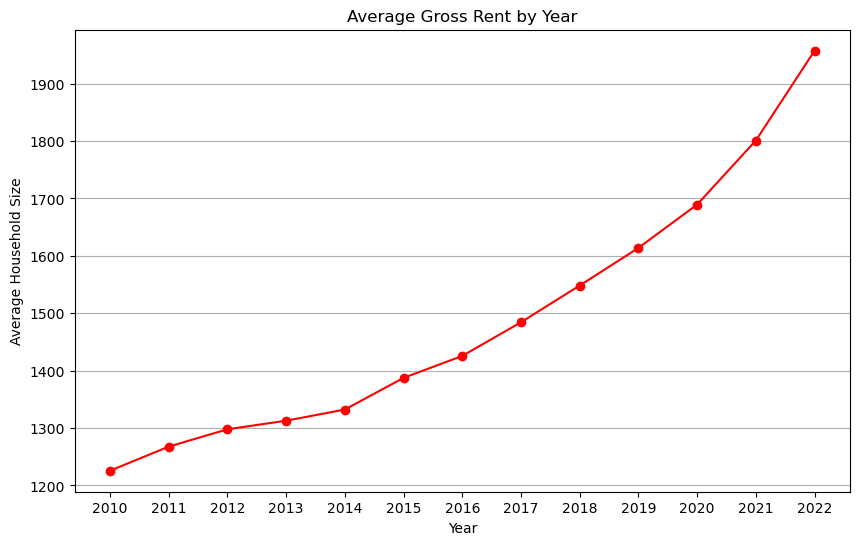

In [6]:
# Load the provided CSV file
file_path = '/home/jovyan/Group assignment 2-xinyi/All Years Median Gross Rent Calculations.csv'
data = pd.read_csv(file_path)

# Group the data by year and calculate the mean of 'avg_hh_size' for each year
grouped_avg_hh_size = data.groupby('year')['med_gross_rent'].mean()

# Create a line plot for avg_hh_size
plt.figure(figsize=(10, 6))
grouped_avg_hh_size.plot(kind='line', color='red', marker='o')
plt.title('Average Gross Rent by Year')
plt.xlabel('Year')
plt.ylabel('Average Household Size')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,2022]) 
plt.grid(axis='y')

# Show the plot
plt.show()

## Draw the rail stop map of the LA county

/tmp/ipykernel_129/2740344468.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


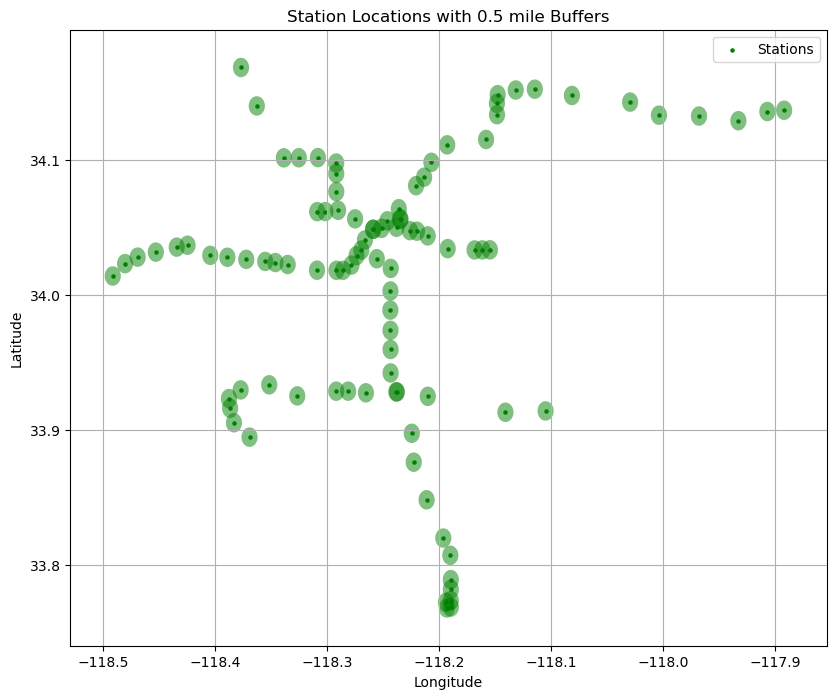

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt


gdf = gpd.read_file ('/home/jovyan/Group assignment 2-xinyi/Stations_All_0316.shp')


# Set the size of the buffer (in meters)
buffer_size = 804  # 500 meters

# Check the current CRS of the GeoDataFrame
current_crs = gdf.crs

# We need to convert the CRS to a metric system for accurate buffer calculation
# Using a common metric CRS - World Equidistant Cylindrical (EPSG:4087)
# This CRS uses meters as units and is suitable for worldwide datasets
gdf_metric = gdf.to_crs(epsg=4087)

# Creating the buffer
gdf_buffer = gdf_metric.buffer(buffer_size)

# Converting buffer back to original CRS for plotting
gdf_buffer = gdf_buffer.to_crs(current_crs)

# Creating a GeoDataFrame for the buffer
gdf_buffer = gpd.GeoDataFrame(geometry=gdf_buffer)

# Plotting the stations and their buffers
plt.figure(figsize=(12, 8))
gdf.plot(ax=plt.gca(), marker='o', color='green', markersize=5, label='Stations')
gdf_buffer.plot(ax=plt.gca(), color='green', alpha=0.5, label='0.5mile Buffer')
plt.title('Station Locations with 0.5 mile Buffers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
geojson_path = '/home/jovyan/Group assignment 2-xinyi/Census_Tracts_2020.geojson'
geo_data = gpd.read_file(geojson_path)

Plot latitude and longtitude of the census tracts

<Axes: >

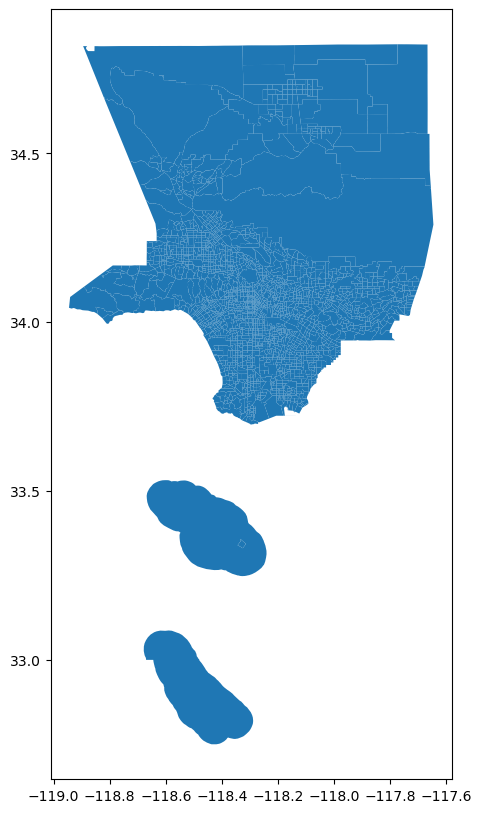

In [9]:
geo_data.plot(figsize=(12,10))

Draw the map of the metro stops in census tracts

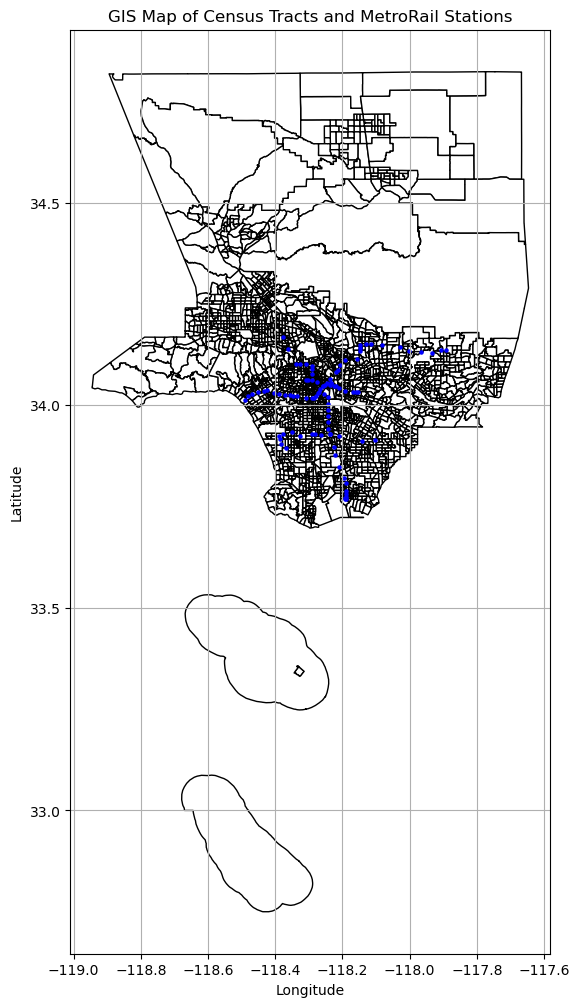

In [10]:
# Plotting both datasets on the same map
plt.figure(figsize=(12, 12))
base = geo_data.plot(ax=plt.gca(), color='white', edgecolor='black')
gdf.plot(ax=base, color='blue', marker='o', markersize=5)
plt.title('GIS Map of Census Tracts and MetroRail Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [11]:
# check the data
geo_data = geo_data[['CT20','geometry']]
geo_data.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


convert data format

In [12]:
geo_data.loc[:, 'geoid20'] = '06' + '037' + geo_data['CT20'].astype(str)
print(geo_data.head())

     CT20                                           geometry      geoid20
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


merge the two datasets

In [13]:
geo_data['geoid20'] = geo_data['geoid20'].astype(int)
data['geoid20'] = data['geoid20'].astype(int)
data_merge = geo_data.merge (data,on='geoid20')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
#check the new dataset
data_merge.head()

,CT20,geometry,geoid20,geoid,year,denom_renters,med_gross_rent,med_gross_rent_adj
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2022,711.0,1573.0,1573.0000
1,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2021,644.0,1689.0,1824.2448
2,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2020,627.0,1723.0,1948.6946
3,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2019,732.0,1737.0,1988.0000
4,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2018,829.0,1609.0,1876.0000


In [15]:
# Filter the merged data for the year 2021,2020,2019
data_2021 = data_merge[data_merge['year'] == 2021]
data_2020 = data_merge[data_merge['year'] == 2020]
data_2019 = data_merge[data_merge['year'] == 2019]
data_2021.head()

,CT20,geometry,geoid20,geoid,year,denom_renters,med_gross_rent,med_gross_rent_adj
1,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2021,644.0,1689.0,1824.2448
14,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1400000US06037101122,2021,344.0,2529.0,2731.5068
27,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",6037101220,1400000US06037101220,2021,762.0,1324.0,1430.0178
40,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,1400000US06037101221,2021,1140.0,1484.0,1602.8296
53,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",6037101222,1400000US06037101222,2021,816.0,1525.0,1647.1127


<Axes: >

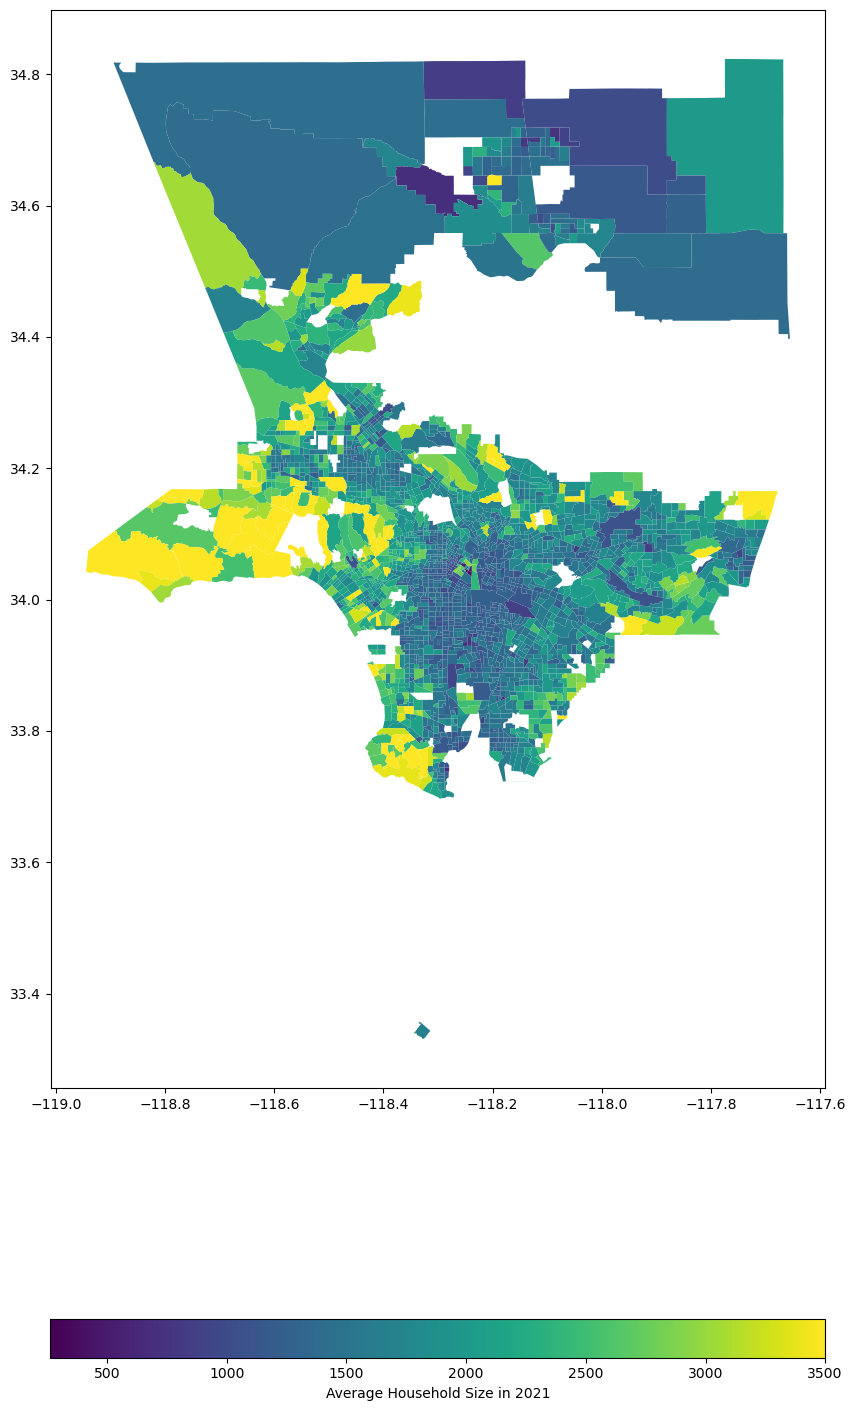

In [17]:
# Plotting the map for 2021
data_2021.plot(figsize=(10,20),
                 column='med_gross_rent',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2021", 'orientation': "horizontal"})

<Axes: >

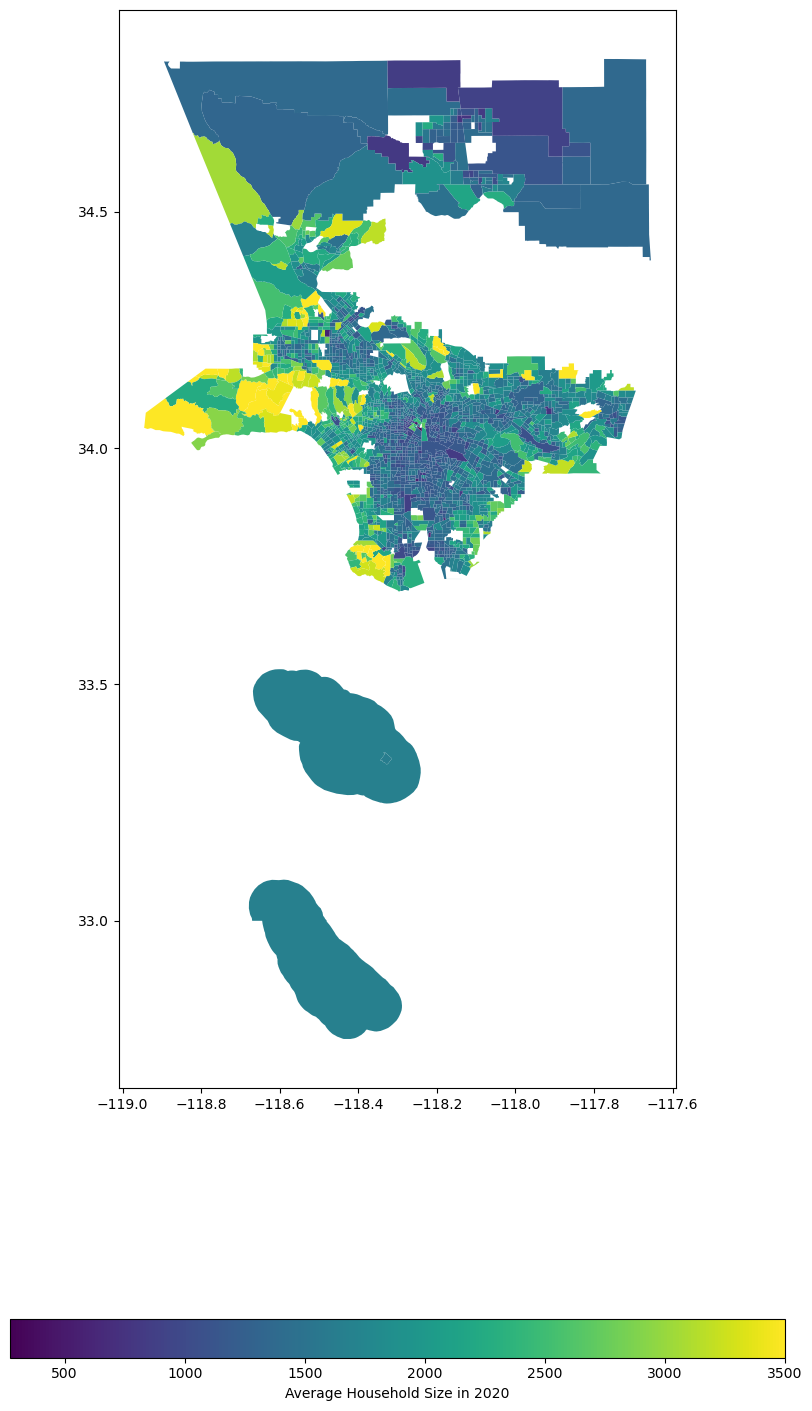

In [19]:
# Plotting the map for 2020
data_2020.plot(figsize=(10,20),
                 column='med_gross_rent',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2020", 'orientation': "horizontal"})

<Axes: >

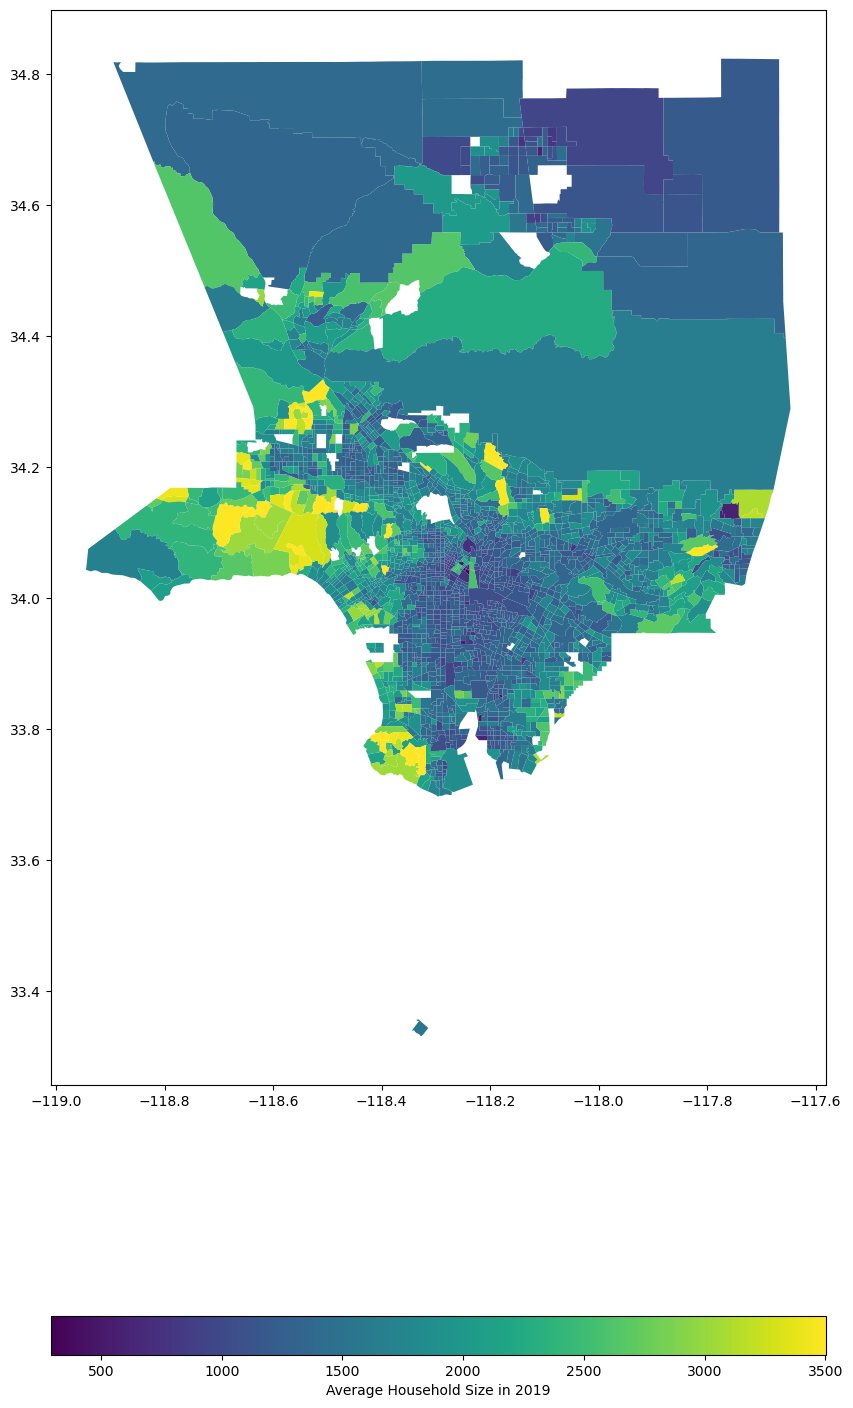

In [20]:
# Plotting the map for 2019
data_2019.plot(figsize=(10,20),
                 column='med_gross_rent',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2019", 'orientation': "horizontal"})

**Compared the household size in each census tract in the past 3 years, we can find that:**

The average household size decreased from 2019 to 2021 in the most of the census tracts.
In the downtown of LA, the household size is larger than that in suburb.

## Combine the median gross rent with the station buffer

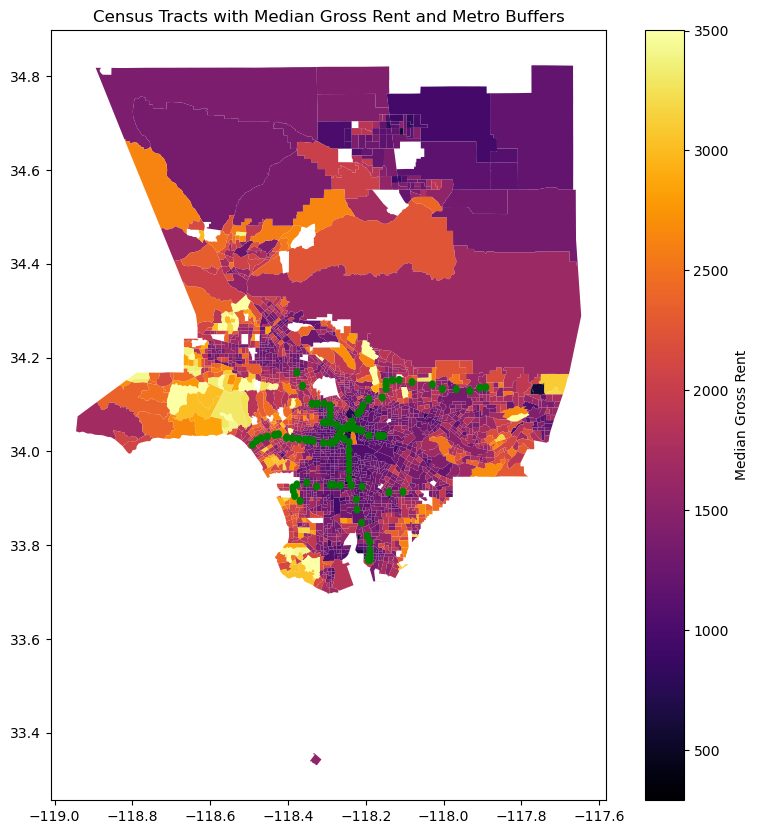

In [29]:

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
data_2019.plot(ax=ax, column='med_gross_rent', cmap='inferno', legend=True, legend_kwds={'label': "Median Gross Rent"})
gdf_buffer.plot(ax=ax, color='green', edgecolor='green', linewidth=1)

plt.title('Census Tracts with Median Gross Rent and Metro Buffers')
plt.show()

Add the basemap

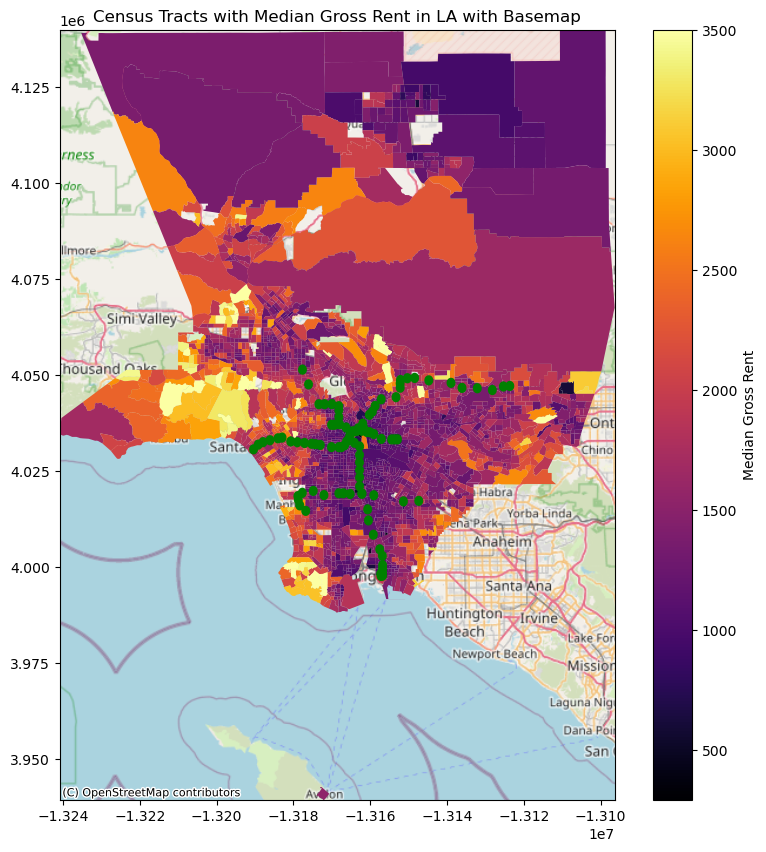

In [44]:
import contextily as ctx

data_2019_la = data_2019.to_crs(epsg=3857)
gdf_buffer_mercator = gdf_buffer.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
data_2019_la.plot(ax=ax, column='med_gross_rent', cmap='inferno', legend=True, legend_kwds={'label': "Median Gross Rent"})
gdf_buffer_mercator.plot(ax=ax, color='green', edgecolor='green', linewidth=2)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_xlim([data_2019_la.total_bounds[0], data_2019_la.total_bounds[2]])
ax.set_ylim([data_2019_la.total_bounds[1], data_2019_la.total_bounds[3]])


plt.title('Census Tracts with Median Gross Rent in LA with Basemap')
plt.show()